<a href="https://colab.research.google.com/github/abhijeet06793/Deep_Learning/blob/master/DogsVsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  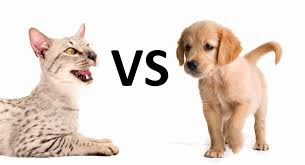Cats Vs Dogs 

### Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPool2D, Flatten, Reshape
from tensorflow.keras.optimizers import Adam, Adadelta, SGD
from tensorflow.keras.activations import relu
from tensorflow.keras.initializers import glorot_normal, glorot_uniform, he_normal, he_uniform, HeNormal, HeUniform
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
import os
import random
import re
import shutil

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Steps to upload the Kaggle cred so as to connect kaggle with Collab

!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"abhi0612","key":"ad4e9eca98ff813bb59df0243e2a6f98"}'}

In [3]:
##Make directory named kaggle and copy kaggle.json file there.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

##Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Dowloading the data from Kaggle using below command

!kaggle competitions download -c dogs-vs-cats

 99% 537M/543M [00:03<00:00, 167MB/s]
100% 543M/543M [00:03<00:00, 153MB/s]
100% 270M/271M [00:02<00:00, 97.6MB/s]
100% 271M/271M [00:02<00:00, 95.7MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 88.6MB/s]


In [6]:
#Unzipping the data and checking the number of images in Train and

!unzip /content/cats-vs-dogs/train.zip -d /content/cats-vs-dogs/train
!unzip /content/cats-vs-dogs/test1.zip -d /content/cats-vs-dogs/test

print("+"*100)

print("The number of images in train data is :",len(os.listdir(path=r'/content/cats-vs-dogs/train/train')))
print("The number of images in test data is :",len(os.listdir(path=r'/content/cats-vs-dogs/test/test1')))

print("+"*100)

count_cats = 0 
for string in os.listdir(path=r'/content/cats-vs-dogs/train/train'):
    if bool(re.search(r'cat', string)) == True:
        count_cats = count_cats +1
print("The number of cats images in training data is :",count_cats)
count_dogs = 0 
for string in os.listdir(path=r'/content/cats-vs-dogs/train/train'):
    if bool(re.search(r'dog', string)) == True:
        count_dogs = count_dogs +1
print("The number of dogs images in training data is :",count_dogs)

print("+"*100)

count_cats = 0 
for string in os.listdir(path=r'/content/cats-vs-dogs/test/test1'):
    if bool(re.search(r'cat', string)) == True:
        count_cats = count_cats +1
print("The number of cats images in test data is :",count_cats)
count_dogs = 0 
for string in os.listdir(path=r'/content/cats-vs-dogs/test/test1'):
    if bool(re.search(r'dog', string)) == True:
        count_dogs = count_dogs +1
print("The number of dogs images in test data is :",count_dogs)

print("\n")

print("There is no label in test data")

Streaming output truncated to the last 5000 lines.
  inflating: /content/cats-vs-dogs/test/test1/5509.jpg  
  inflating: /content/cats-vs-dogs/test/test1/551.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5510.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5511.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5512.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5513.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5514.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5515.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5516.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5517.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5518.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5519.jpg  
  inflating: /content/cats-vs-dogs/test/test1/552.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5520.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5521.jpg  
  inflating: /content/cats-vs-dogs/test/test1/5522.jpg  
  inflating: /content/cats-vs-dogs/test

In [8]:
#Creating a directort within train for train, validation , test data indivisually for cat and dogs

#Creating Folders containg cats data for train, test and val data

images = os.listdir(r'/content/cats-vs-dogs/train/train')
cats_images = [i for i in images if bool(re.search(r'cat', i))==True]
dogs_images = [i for i in images if bool(re.search(r'dog', i))==True]

#Copying the 
if os.path.isdir(r'/content/cats-vs-dogs/train/model_data/train/cats')==False:
    os.mkdir(r'/content/cats-vs-dogs/train/model_data/train/cats')
    for i in cats_images[0:8000]:
        shutil.copy(src = '/content/cats-vs-dogs/train/train/'+i, dst = '/content/cats-vs-dogs/train/model_data/train/cats')

if os.path.isdir(r'/content/cats-vs-dogs/train/model_data/train/dogs')==False:
    os.mkdir(r'/content/cats-vs-dogs/train/model_data/train/dogs' )
    for i in dogs_images[0:8000]:
        shutil.copy(src = '/content/cats-vs-dogs/train/train/'+i, dst = '/content/cats-vs-dogs/train/model_data/train/dogs')

#=========================================================================================================================        
        
if os.path.isdir(r'/content/cats-vs-dogs/train/model_data/validation/cats')==False:
    os.mkdir(r'/content/cats-vs-dogs/train/model_data/validation/cats')
    for i in cats_images[8000:10000]:
        shutil.copy(src = '/content/cats-vs-dogs/train/train/'+i, dst = '/content/cats-vs-dogs/train/model_data/validation/cats')
        
if os.path.isdir(r'/content/cats-vs-dogs/train/model_data/validation/dogs')==False:
    os.mkdir(r'/content/cats-vs-dogs/train/model_data/validation/dogs')
    for i in dogs_images[8000:10000]:
        shutil.copy(src = '/content/cats-vs-dogs/train/train/'+i, dst = '/content/cats-vs-dogs/train/model_data/validation/dogs')
        
        
#===========================================================================================================================
        
if os.path.isdir(r'/content/cats-vs-dogs/train/model_data/test/cats')==False:
    os.mkdir(r'/content/cats-vs-dogs/train/model_data/test/cats' )
    for i in cats_images[10000:12500]:
        shutil.copy(src = '/content/cats-vs-dogs/train/train/'+i, dst = '/content/cats-vs-dogs/train/model_data/test/cats')
        
                
if os.path.isdir(r'/content/cats-vs-dogs/train/model_data/test/dogs')==False:
    os.mkdir(r'/content/cats-vs-dogs/train/model_data/test/dogs')
    for i in dogs_images[10000:12500]:
        shutil.copy(src = '/content/cats-vs-dogs/train/train/'+i, dst = '/content/cats-vs-dogs/train/model_data/test/dogs')

In [9]:
print("Training Data :")
print("Cats: ",len(os.listdir(path=r'/content/cats-vs-dogs/train/model_data/train/cats')))
print("Dogs: ",len(os.listdir(path=r'/content/cats-vs-dogs/train/model_data/train/dogs')))

print("="*20)

print("Validation data Data :")
print("Cats: ",len(os.listdir(path=r'/content/cats-vs-dogs/train/model_data/validation/cats')))
print("Dogs: ",len(os.listdir(path=r'/content/cats-vs-dogs/train/model_data/validation/dogs')))

print("="*20)

print("Test Data :")
print("Cats: ",len(os.listdir(path=r'/content/cats-vs-dogs/train/model_data/test/cats')))
print("Dogs: ",len(os.listdir(path=r'/content/cats-vs-dogs/train/model_data/test/dogs')))



Training Data :
Cats:  8000
Dogs:  8000
Validation data Data :
Cats:  2000
Dogs:  2000
Test Data :
Cats:  2500
Dogs:  2500


In [10]:
train_path = r"/content/cats-vs-dogs/train/model_data/train"
test_path = r"/content/cats-vs-dogs/train/model_data/test"
val_path = r"/content/cats-vs-dogs/train/model_data/validation"

#Creating a ImageDataGenerator object which generate Tensor image data with real time data augmentaion for each image 
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) #the preprocess_input is required to be done before runing vgg16

#Takes the path to a directory & generates batches of augmented data.It create batch of data so here its creating data in batch size of 10.
#It will create batches of data from the directory where our dataset resides.

train_datagen = datagen.flow_from_directory(directory=train_path, target_size=(224, 224), classes = ['cats','dogs'], batch_size=50,)
val_datagen = datagen.flow_from_directory(directory=val_path, target_size=(224, 224), classes = ['cats','dogs'], batch_size=50)
test_datagen = datagen.flow_from_directory(directory=test_path, target_size=(224, 224), classes = ['cats','dogs'], batch_size=50, shuffle=False)
# train_datagen is a DirectoryIterator yielding tuples of (x, y)


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
#The total number of batch created is total_data / batch_size = 16000 / 50 = 320
print("The number of batches of data in train_datagen is",len(train_datagen))
print("The number of batches of data in test_datagen is",len(test_datagen))
print("The number of batches of data in val_datagen is",len(val_datagen))

The number of batches of data in train_datagen is 320
The number of batches of data in test_datagen is 100
The number of batches of data in val_datagen is 80


In [12]:
#Function to plot image

def plot_image(image_array):
    fig , axes = plt.subplots(5, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(image_array, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [13]:
print("Class: ",train_datagen.class_indices)
print("Total size: ",train_datagen.n)

Class:  {'cats': 0, 'dogs': 1}
Total size:  16000


Shape imgs: (50, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

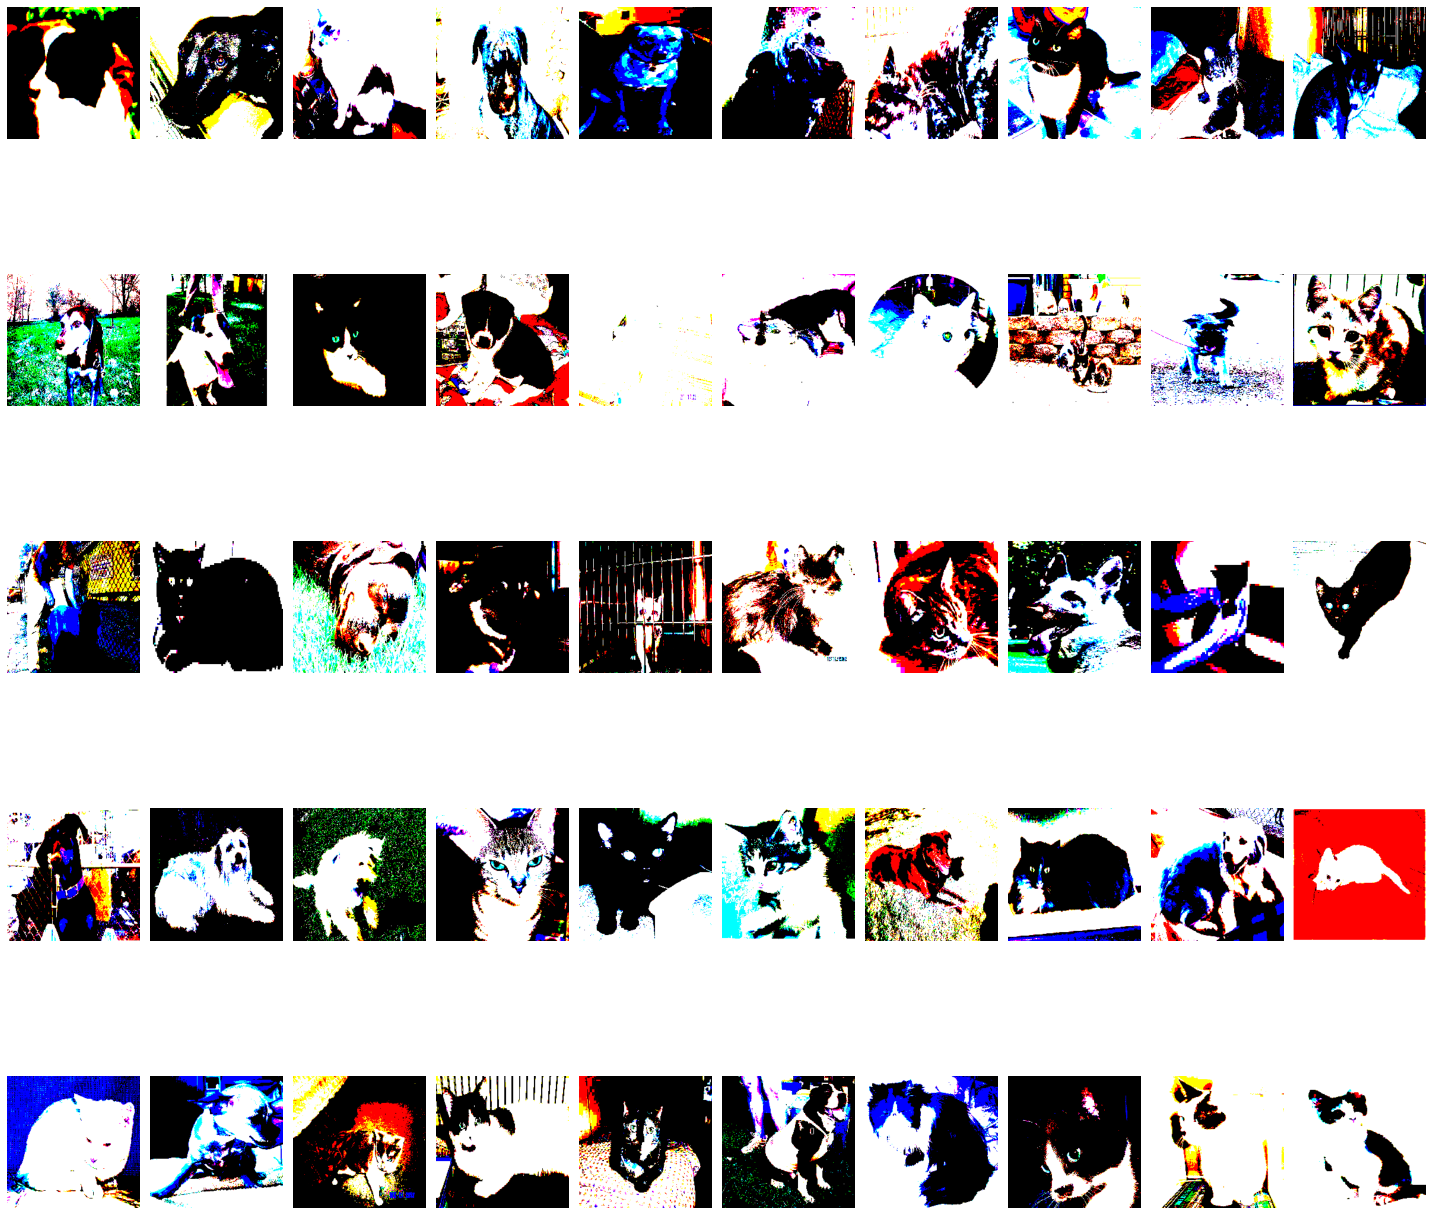

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
imgs, labels = next(train_datagen) 
print("Shape imgs:", imgs.shape)

plot_image(imgs)
print(labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

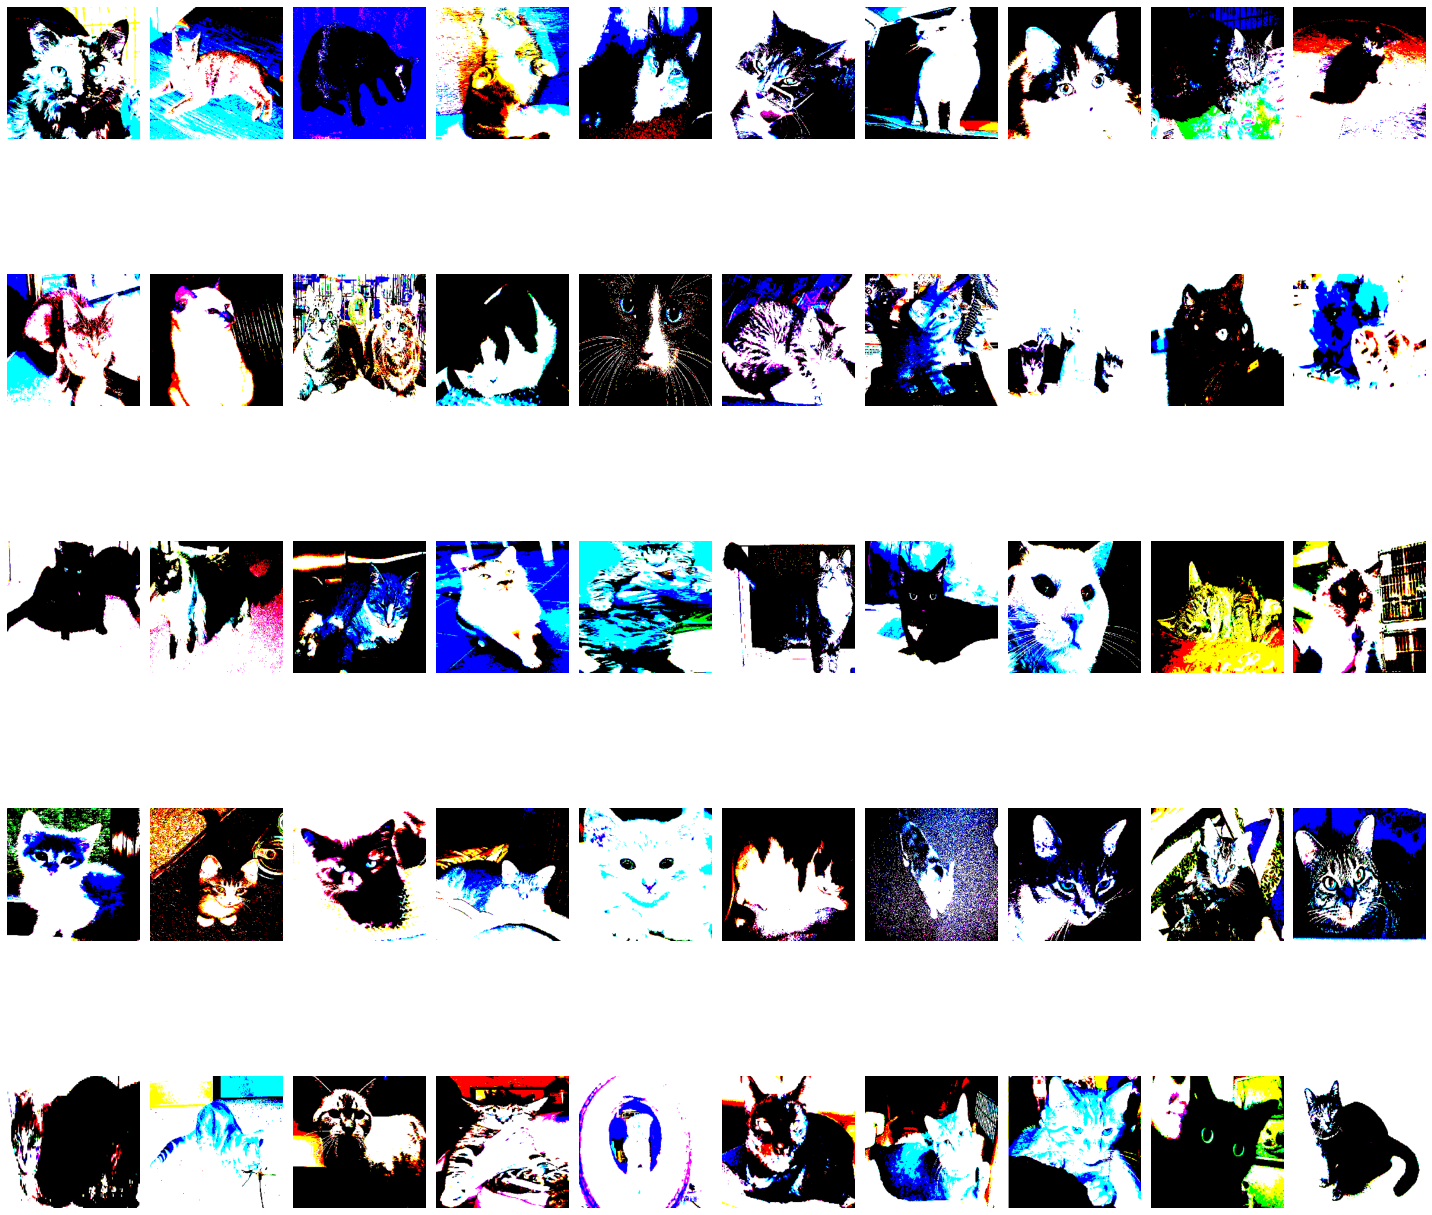

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
imgs, labels = next(test_datagen) #this data is not shuffled

plot_image(imgs)
print(labels)

## Building a simple CNN Model 

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'same', input_shape = (224, 224, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 2, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [17]:
#Model compilation

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [18]:
#Fit_generator is deprecate and we can use fit also

model.fit(x = train_datagen, epochs=10, validation_data=val_datagen)

Epoch 1/10
320/320 [==============================] - 82s 235ms/step - loss: 73.5139 - accuracy: 0.5760 - val_loss: 0.6268 - val_accuracy: 0.6410
Epoch 2/10
320/320 [==============================] - 74s 233ms/step - loss: 0.6158 - accuracy: 0.6571 - val_loss: 0.6188 - val_accuracy: 0.6665
Epoch 3/10
320/320 [==============================] - 74s 230ms/step - loss: 0.5407 - accuracy: 0.7342 - val_loss: 0.6403 - val_accuracy: 0.6522
Epoch 4/10
320/320 [==============================] - 73s 229ms/step - loss: 0.4437 - accuracy: 0.7909 - val_loss: 0.6769 - val_accuracy: 0.6475
Epoch 5/10
320/320 [==============================] - 73s 228ms/step - loss: 0.3367 - accuracy: 0.8590 - val_loss: 0.8036 - val_accuracy: 0.6482
Epoch 6/10
320/320 [==============================] - 73s 229ms/step - loss: 0.2487 - accuracy: 0.9007 - val_loss: 0.8891 - val_accuracy: 0.6420
Epoch 7/10
320/320 [==============================] - 73s 229ms/step - loss: 0.1732 - accuracy: 0.9333 - val_loss: 1.0270 - val_a

In [19]:
score= model.evaluate(test_datagen, verbose=0)
#it returns loss value and metric value
print("Accuracy of the model on test data is:",score[1])

Accuracy of the model on test data is: 0.6467999815940857


In [20]:
predictions = model.predict(test_datagen)
class_pred = np.argmax(predictions, axis = 1)

In [21]:
print(test_datagen.class_indices)
confusion_matrix(test_datagen.classes, class_pred)

{'cats': 0, 'dogs': 1}


array([[1785,  715],
       [1051, 1449]])

#Training on VGG 16 model

In [24]:
#Importing the VGG16 model with complete architecture and weight
vgg16_model =  tf.keras.applications.vgg16.VGG16(include_top=True)

vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
print(type(vgg16_model))
print("The VGG16 is a functional model and we have learnt Sequential models. So we are going to fit it to Sequential model.")

<class 'tensorflow.python.keras.engine.functional.Functional'>
The VGG16 is a functional model and we have learnt Sequential models. So we are going to fit it to Sequential model.


In [26]:
#Creating a sequential model and fitting all the layers except the last layer
model = Sequential()
for each_layer in vgg16_model.layers[0:-1]:
    model.add(each_layer)

print(type(model))  

<class 'tensorflow.python.keras.engine.sequential.Sequential'>


In [27]:
#Adding a last layer with 2 classes and softmax activation
model.add(Dense(units = 2, activation = 'softmax'))

for layers in model.layers[0:-1]:
    layers.trainable = False    # all the layers are frozed except last layer. so all the layers ahve weights fixed.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

#Fit_generator is deprecate and we can use fit also
model.fit(x = train_datagen, epochs=5, validation_data=val_datagen)

Epoch 1/5
320/320 [==============================] - 87s 267ms/step - loss: 0.0997 - accuracy: 0.9631 - val_loss: 0.0844 - val_accuracy: 0.9770
Epoch 2/5
320/320 [==============================] - 86s 268ms/step - loss: 0.0428 - accuracy: 0.9852 - val_loss: 0.0953 - val_accuracy: 0.9768
Epoch 3/5
320/320 [==============================] - 86s 269ms/step - loss: 0.0312 - accuracy: 0.9875 - val_loss: 0.0702 - val_accuracy: 0.9815
Epoch 4/5
320/320 [==============================] - 87s 270ms/step - loss: 0.0166 - accuracy: 0.9943 - val_loss: 0.0672 - val_accuracy: 0.9830
Epoch 5/5
320/320 [==============================] - 87s 270ms/step - loss: 0.0223 - accuracy: 0.9920 - val_loss: 0.0657 - val_accuracy: 0.9833


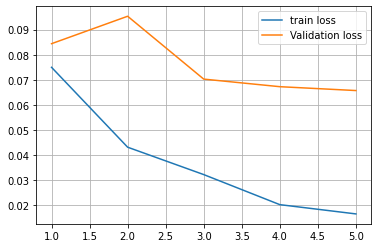

In [29]:
#plotting train and validation loss

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,6), train_loss, label="train loss")
plt.plot(range(1,6), val_loss, label="Validation loss")
plt.legend()
plt.show()

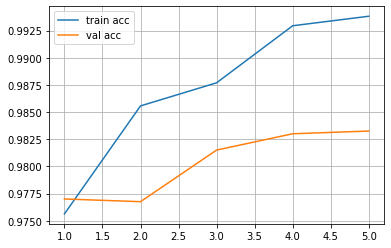

In [30]:
#Plotting train and validation accuracy
train_accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,6), train_accuracy, label="train acc")
plt.plot(range(1,6), val_accuracy, label="val acc")
plt.legend()
plt.show()

In [36]:
model_pred = model.predict(test_datagen)
pred_class = np.argmax(model_pred, axis = 1)
confusion_matrix(test_datagen.classes, pred_class)

array([[2453,   47],
       [  39, 2461]])